<a href="https://colab.research.google.com/github/marco-finger/DSF-FS22-MarcoFinger/blob/main/Semesterproject_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*475186-FS2022-0-Data Science Fundamentals - for chemists and biochemists \\
Semester project: molecular dynamics (MD) with use of high performance computing (HPC) cluster*

# Semesterproject - Group 5

## Getting Started

**PuTTY**


---




*   terminal emulator for Microsoft Windows but can be ported to MacOS
*   recommended to use the built-in SSH client instead

 <br>

**Terminal**


---

*   Command-line interface on Macs
*  Terminal emulator and built-in shell


 <br>


**VPN**


---
* VPN from Universtiy is needed to access both Chemzilla and UBELIX when working from home

 <br>


**FileZilla**


---
* installed and connected to both servers
* used to upload and download files from the servers

**PyMOL**

---

* used to visualize our pre-cleaned protein 1TCX (HIV Triple Mutant Protease Complexed with Inhibitor)


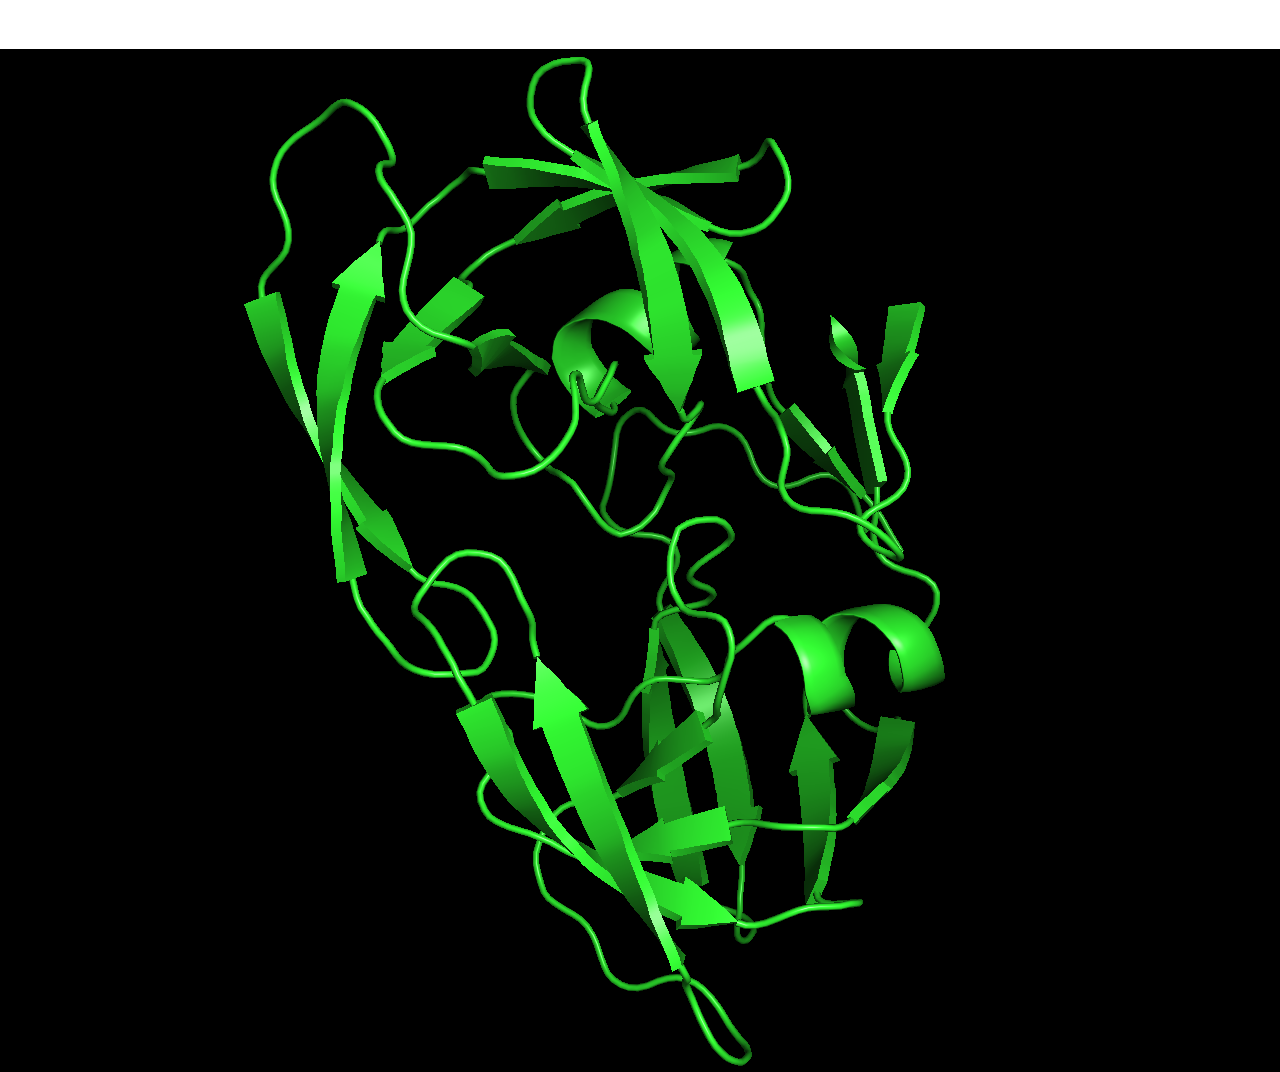



##GROMACS Tutorial

**Performing tutorial according to instructions with paying attention to:**


---


*   adopting file names where necessary
* waiting for processes to finish and checking for feedback/output
* using the newest version of files

<br>

**Plots (created in python)**


---

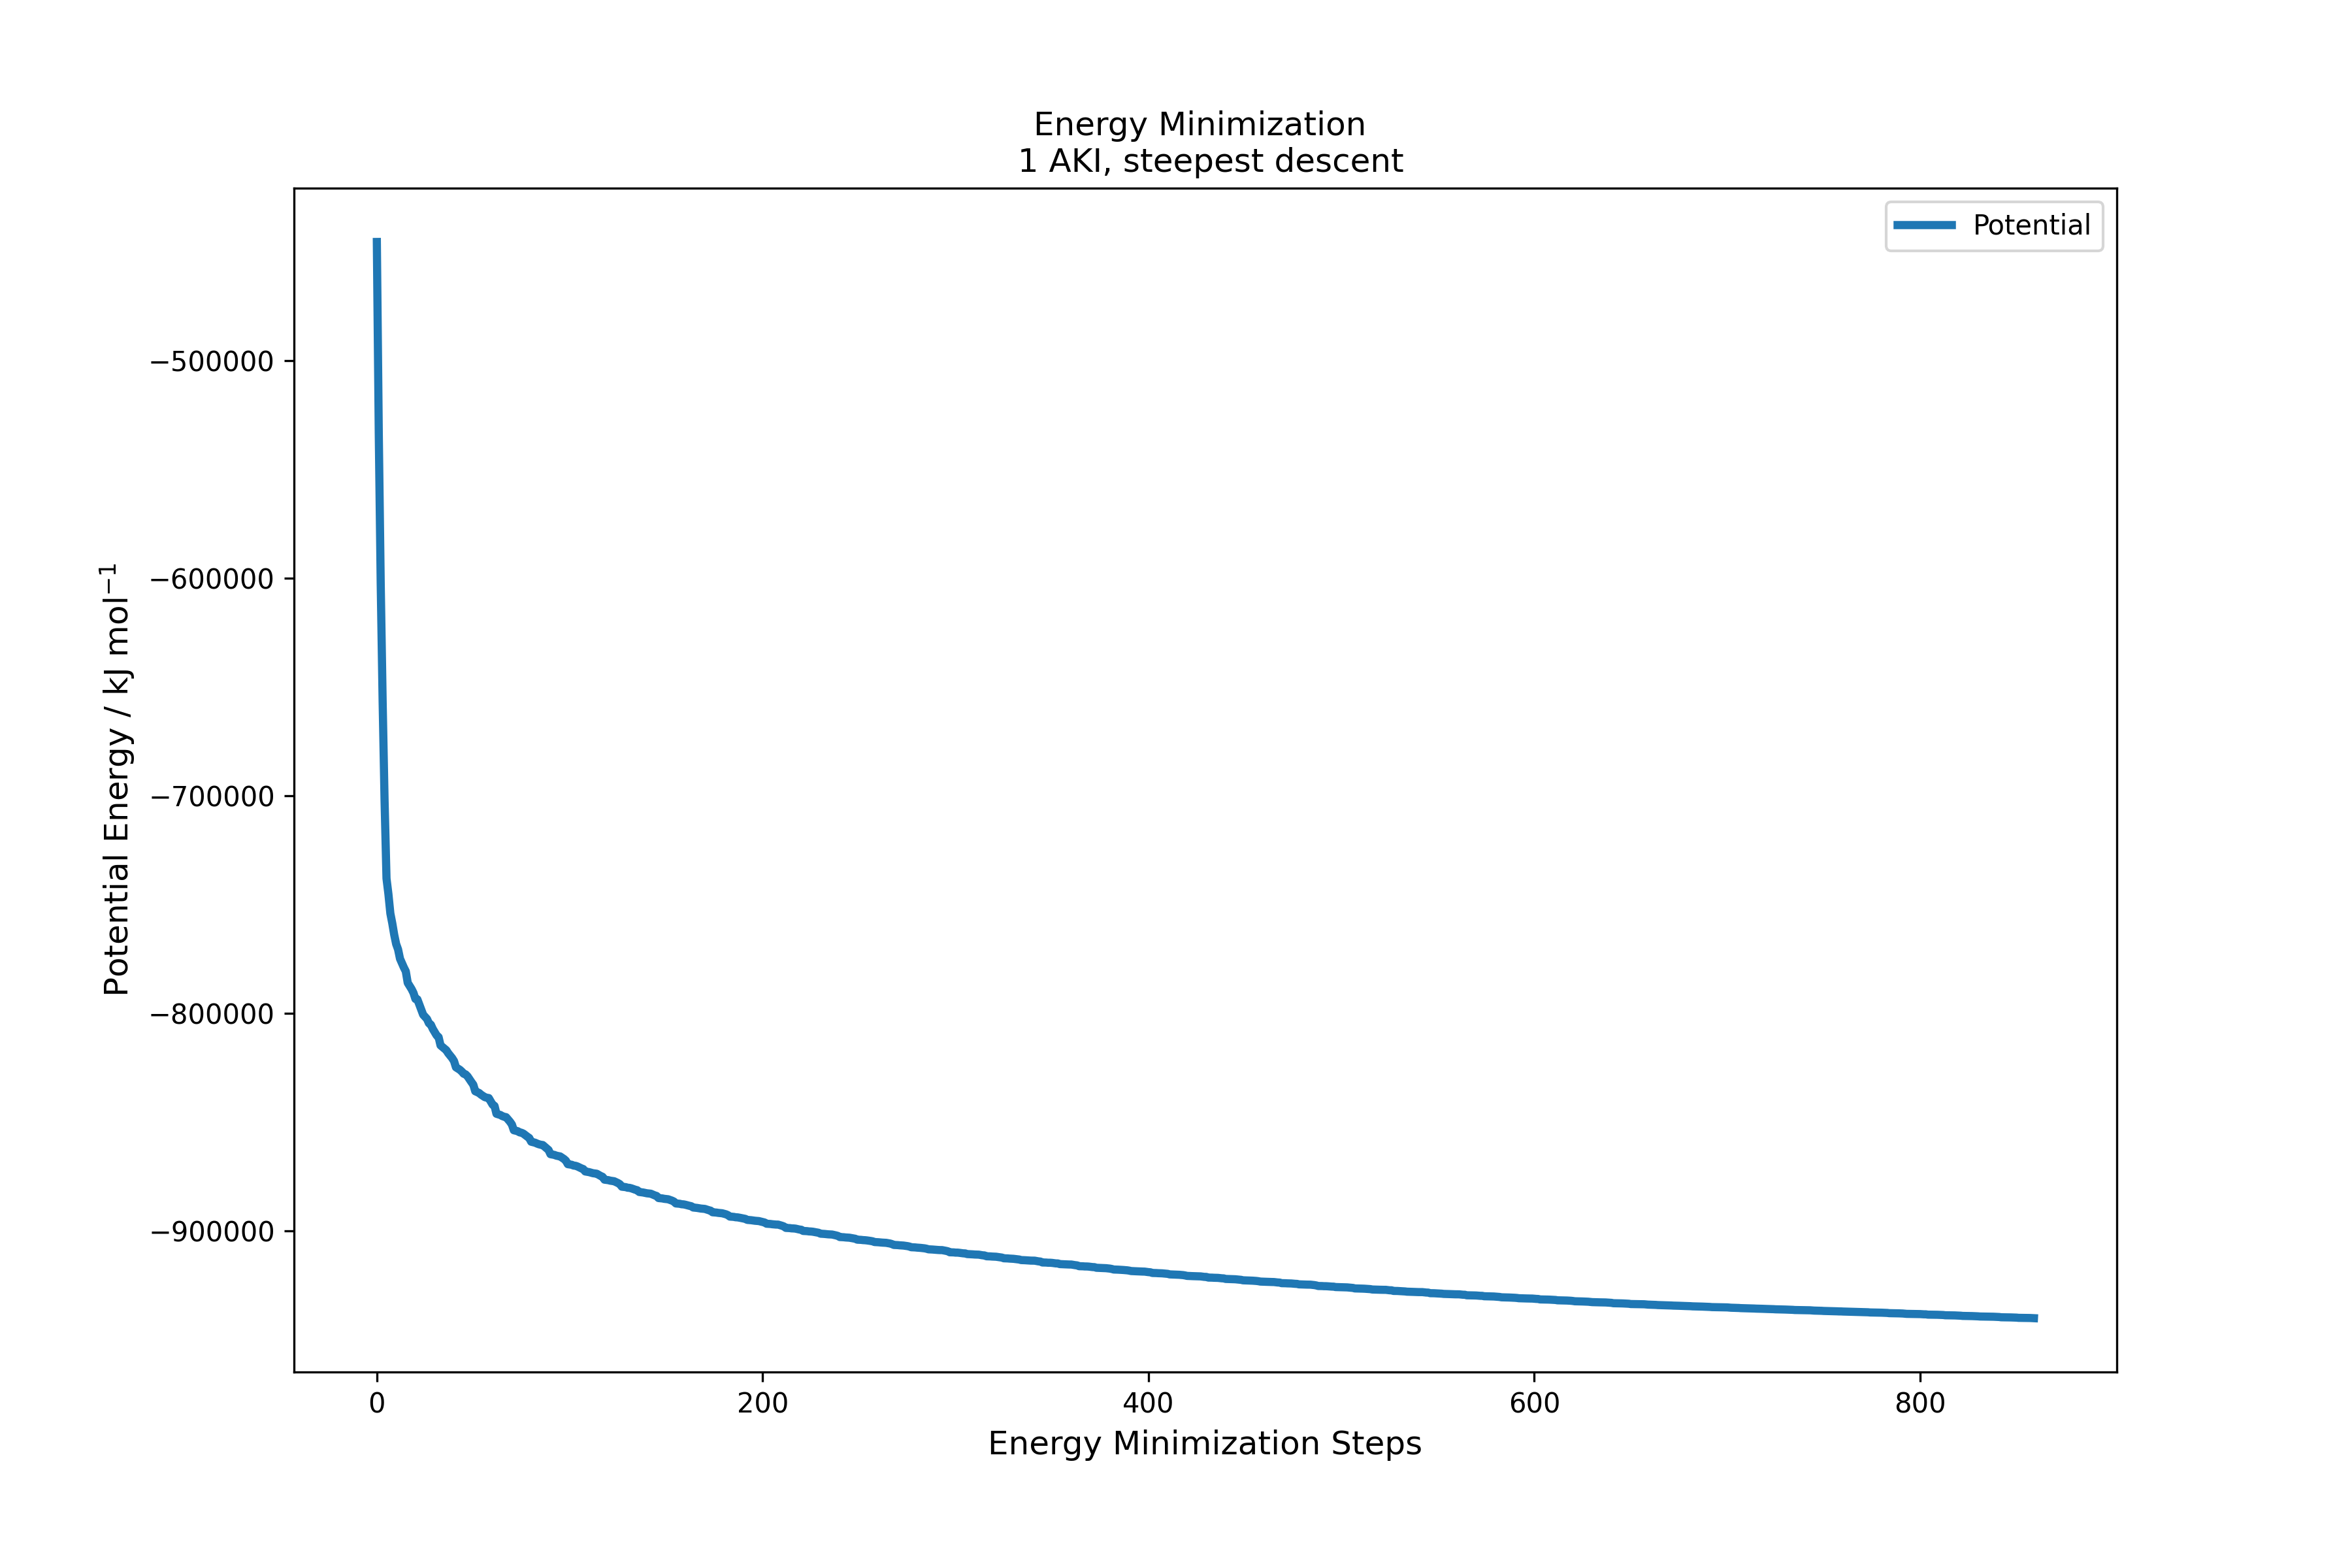


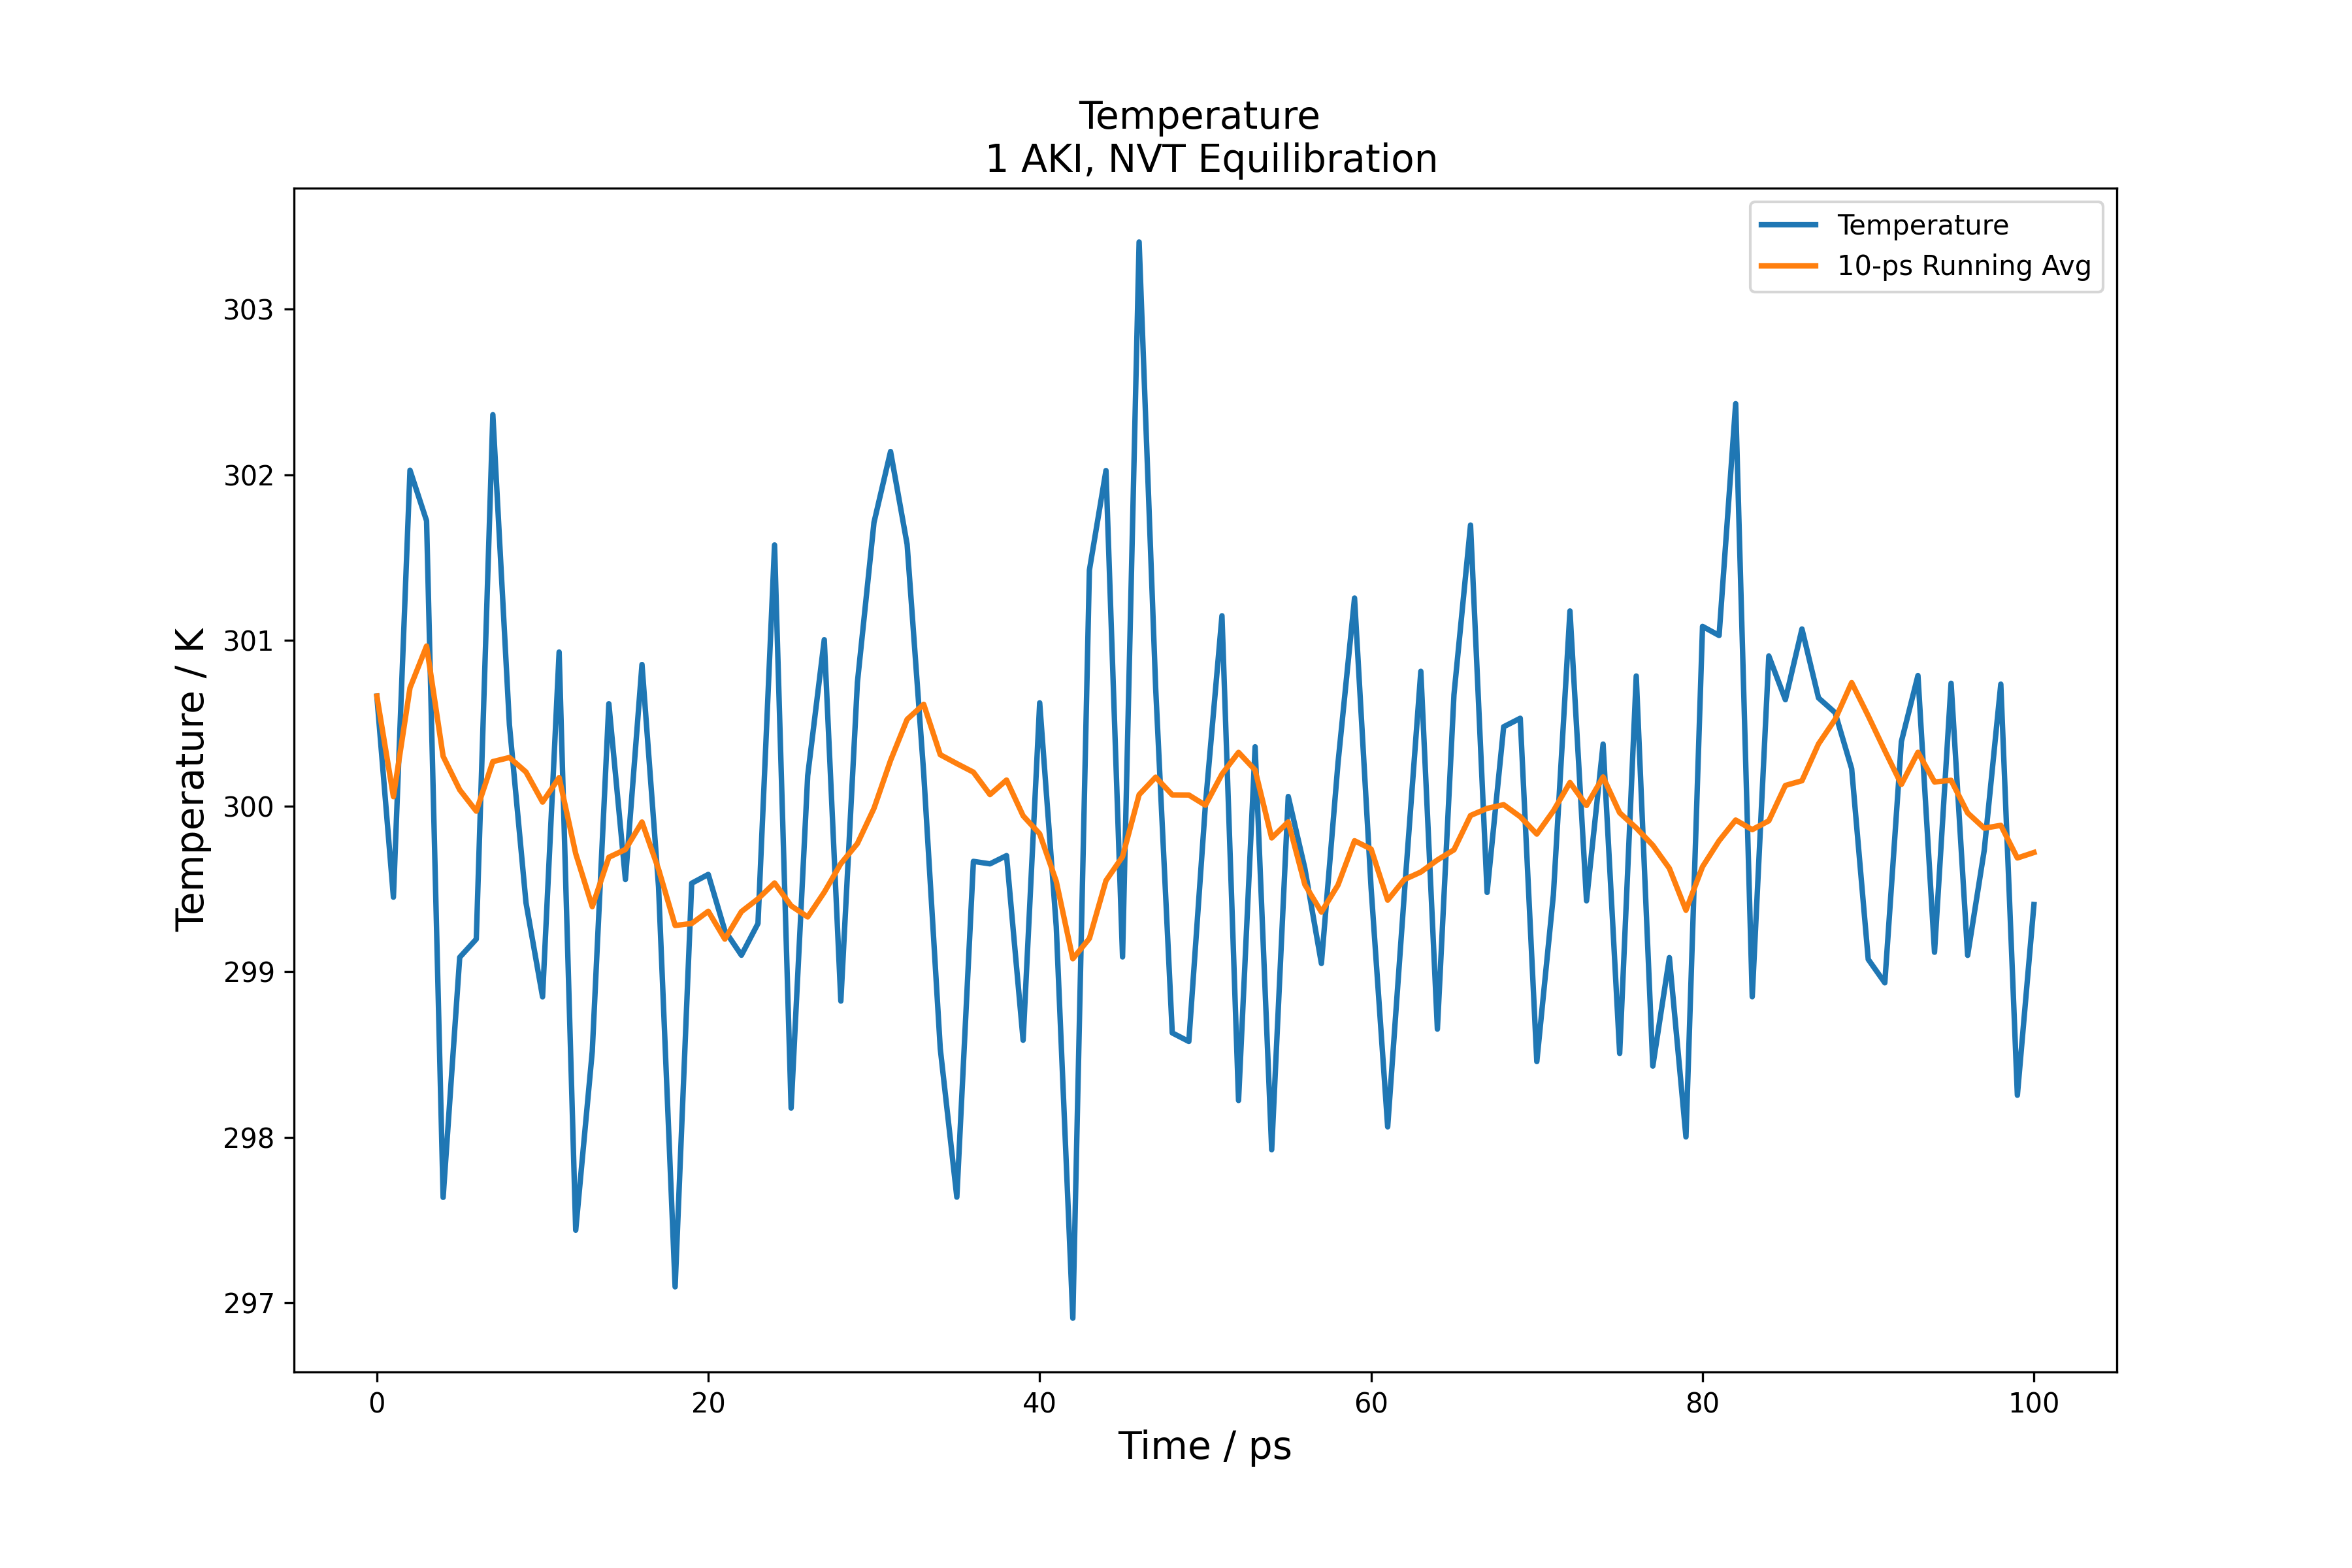

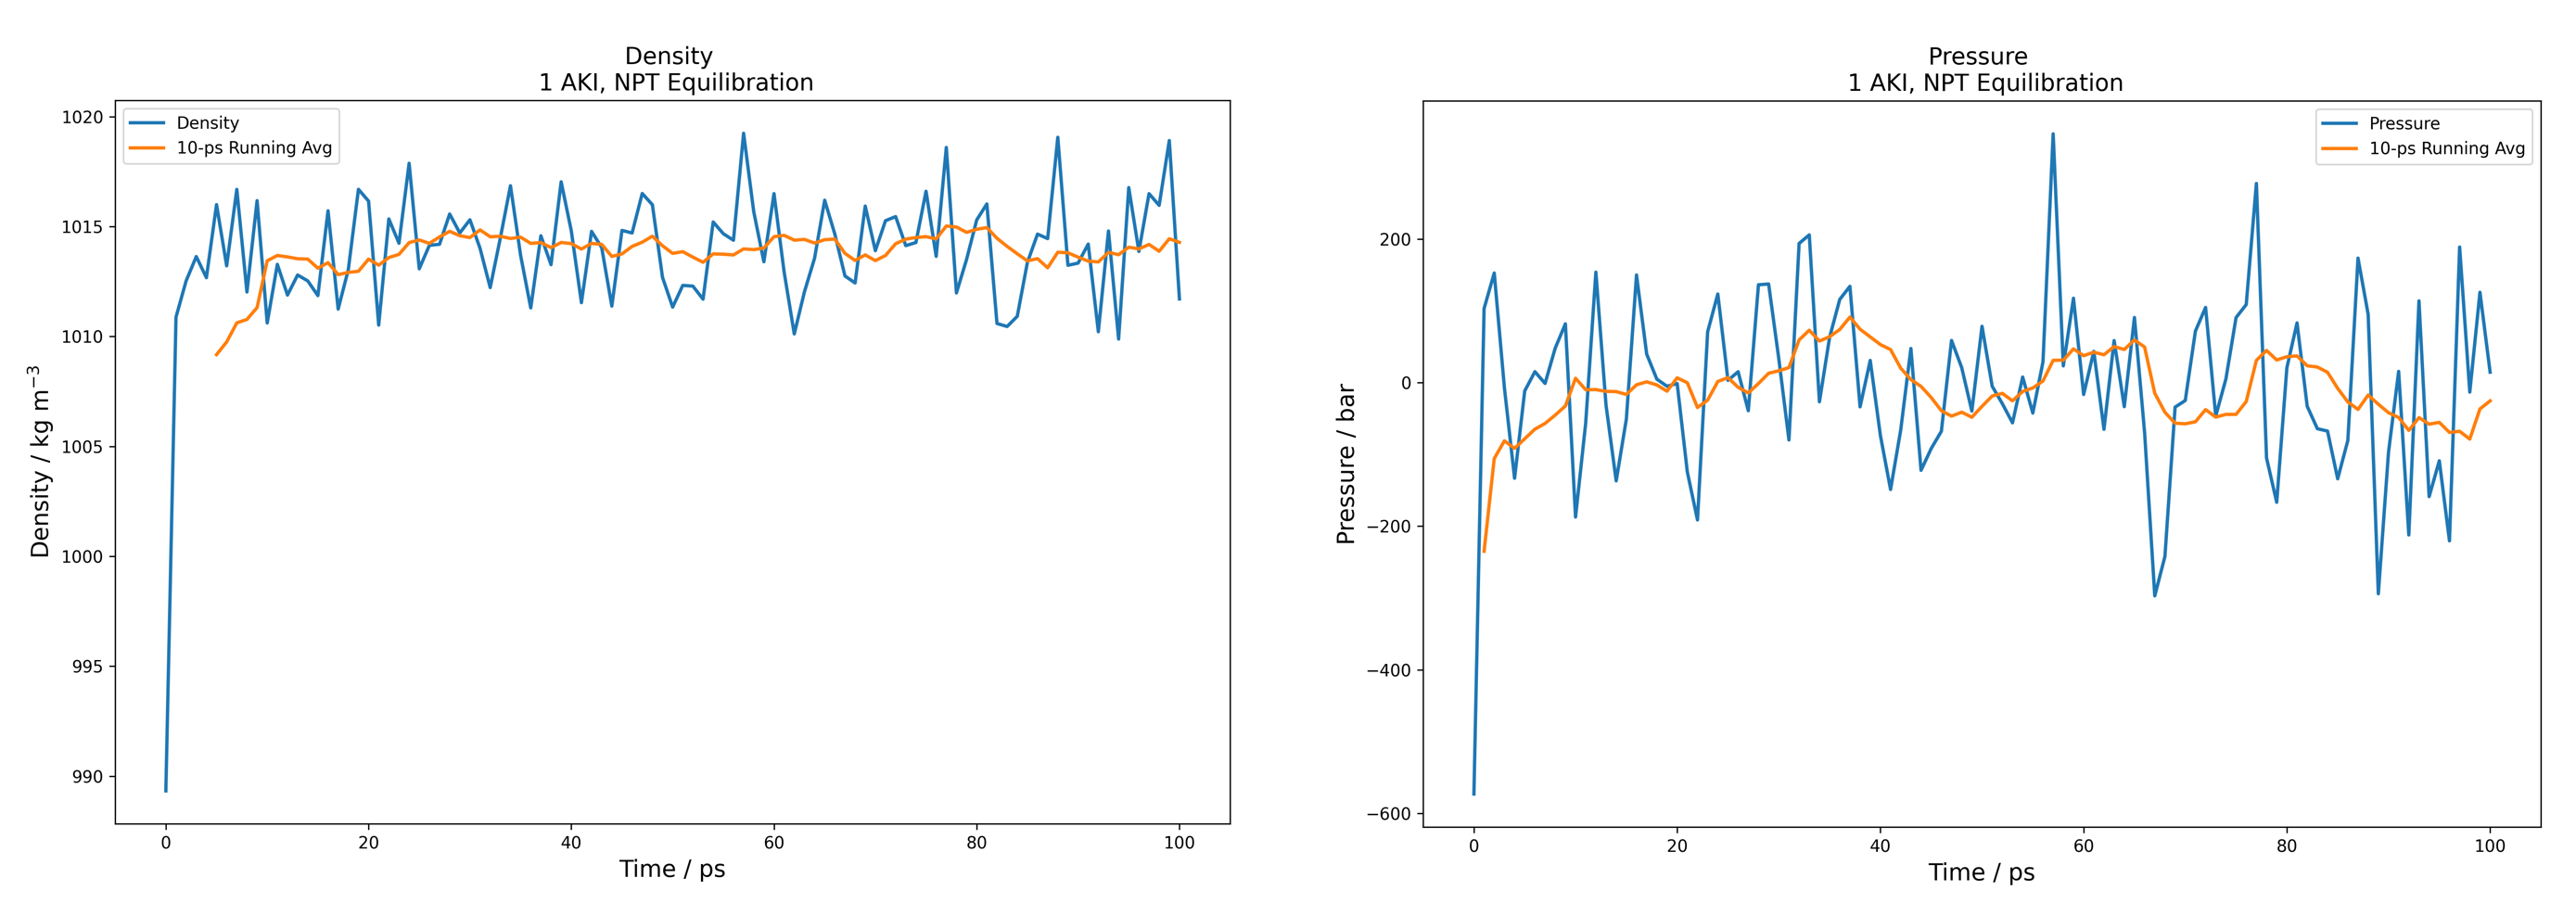

## UBELIX

**Hello World**

---

Steps to run the *Hello world* script:

* Read relevant entries of the HPC Documentation (Quick Start, Accounts and Activation, Submitting jobs)

* Activated our Campus Accounts to access UBELIX

*   Prepared python and job submission script




In [ ]:
# with open('hello_world.txt', 'w') as doc:
#   doc.write('Hello World')

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Hello World"
# #SBATCH --time=00:10:00
# #SBATCH --mem-per-cpu=1M
# #your code below this line
# module load Python
# srun python3 hello_world.py




*   Submitted job via sbatch command
*  Checked generated hello_world.txt file



<br>



**Production MD** 

---



1.   Checked how to load GROMACS on UBELIX
 




In [ ]:
# module list

2.  Wrote new job submission script
3.  Uploaded the files that occured in the commands to our working directory on UBELIX
4.  Submitted new job script
<br>
**Attempt 1:**

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #your code below this line
# module load GROMACS/2020-foss-2019b
# srun gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# srun gmx mdrun -deffnm md_0_1_epyc2

This job failed immediately.
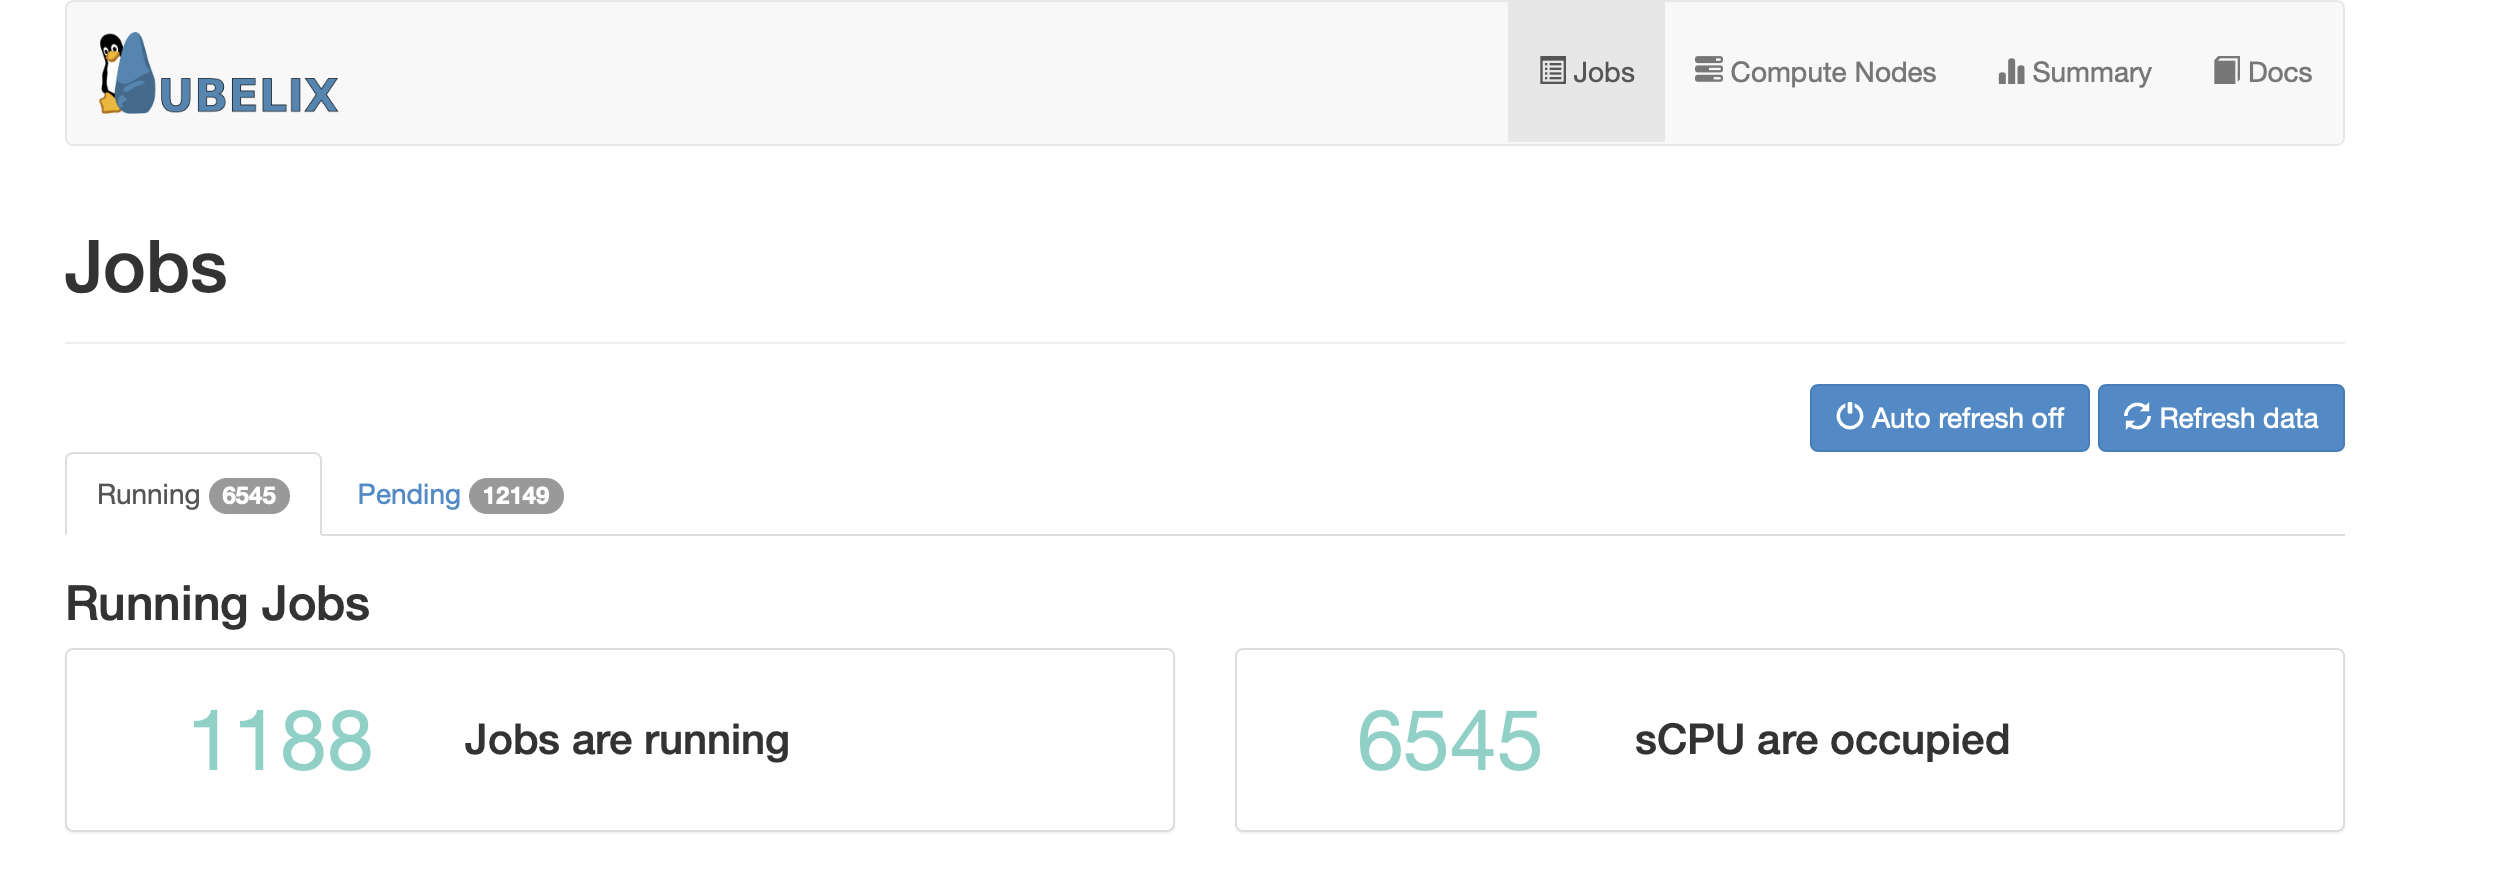
 The website https://ubelix.unibe.ch/jobs/running provides a list of running and pending jobs. It showed failure due to NonZeroExitCode. 


**Attempt 2:**
Removed  srun

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

Job also failed.

**Attempt 3:** Added mail option, output, and error file


*   Useful information from HPC documentation in section 'Investigating a Job Failure'






In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=12:00:00
# #SBATCH --mem-per-cpu=1G
# #SBATCH --partition=epyc2
# #SBATCH --mail-user=marco.finger@students.unibe.ch
# #SBATCH --mail-type=fail,end
# #SBATCH --output=/storage/homefs/mf17l023/DSF22/MD_Production_Run
# #SBATCH --error=/storage/homefs/mf17l023/DSF22/MD_Production_Run
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

Error file informed us: *'Fatal error: Topology include file "topol_Protein_chain_A.itp" not found'* <br> 
After uploading the missing file it still did not work.<br>
Error and output files were not generated anymore.
<br> 
<br> 
**Attempt 4:** Changed output, error commands, increased time and memory and uploaded the whole tutorial folder


In [ ]:
# #!/bin/bash
# #SBATCH --job-name="Production epyc2"
# #SBATCH --time=48:00:00
# #SBATCH --mem-per-cpu=16G
# #SBATCH --partition=epyc2
# #SBATCH --mail-user=marco.finger@students.unibe.ch
# #SBATCH --mail-type=fail,end
# #SBATCH -o %j.output
# #SBATCH -e %j.error
# #your code below this line
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md_epyc2.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1_epyc2.tpr
# gmx mdrun -deffnm md_0_1_epyc2

This job did run for approximately 3 min before failing. <br>
The excpected .tpr, .edr, .xct and .log files were created.<br>
Both .edr and .xct were empty.<br>
The log file stated:<br>
*'Fatal error: 14 particles communicated to PME rank 17 are more than 2/3 times the cut-off out of the domain decomposition cell of their charge group in dimension y. This usually means that your system is not well equilibrated.'*
<br>
<br>
**Further Attempts:**


*  running without specifying a partition -> same fatal error
*   running on bdw partition -> gmx commands not found
* running both gmx commands separately -> 1. succeeded and the 2. failed with same error 
<br>
<br>

**Looking up Error:**





*   following the link at the bottom of the log file
*   cause for error seems to be that our system is tearing apart






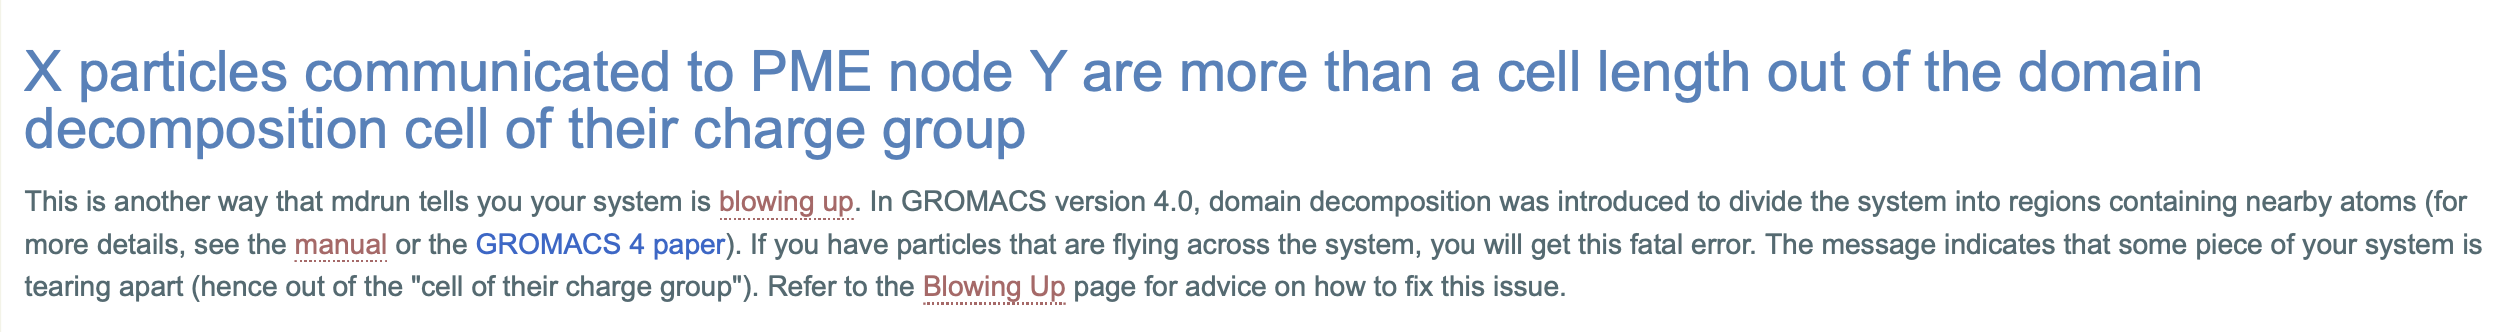
http://www.gromacs.org/Documentation/Errors#X_particles_communicated_to_PME_node_Y_are_more_than_a_cell_length_out_of_the_domain_decomposition_cell_of_their_charge_group

## Learning Outcomes



*   Remote access to servers
*   Introduction into MD
*   Basic Bash / command line interface / Terminal window
*   SLURM scheduling system
*   Accessing UBELIX and perform basic computations



## Conclusion



*   Take your time and read the manuel beforehand, especially when it comes to UBELIX
*   When working from home, connect to the Uni VPN
*   Always make sure to use latest versions of your files and name them properly
*   Files should always be in the correct directory
*   Patience and resilience are key

